In [20]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans
import cv2

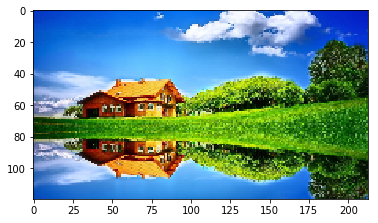

In [21]:
im=cv2.imread('./image.jpg')
im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
# To reshape
r,c=im.shape[:2]
orr=120
oc=int(orr*float(c)/r)
im=cv2.resize(im,(oc,orr))
pixels = im.reshape((-1, 3))
plt.imshow(im)

In [22]:
# Applying KMeans from scikit learn
km = KMeans(n_clusters=5)
km.fit(pixels)
km.cluster_centers_

array([[ 196.54171261,  216.48217567,  238.10657846],
       [  42.9437067 ,   69.71203811,   13.022806  ],
       [  24.42371373,  102.9092042 ,  211.77532491],
       [ 148.76244299,  177.10608765,   36.14792782],
       [  88.64178252,  164.78346982,  235.85659874]])

In [23]:
colors = np.asarray(km.cluster_centers_, dtype='uint8')

In [24]:
# To calculate % of each dominant color
per = np.asarray(np.unique(km.labels_, return_counts=True)[1], dtype='float32')
per = per / pixels.shape[0]
per

array([ 0.1064554 ,  0.27073553,  0.21995305,  0.19761346,  0.20524256], dtype=float32)

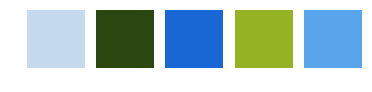

In [25]:
# To visualize dominant colors
plt.figure(0)
for ix in range(colors.shape[0]):
    patch = np.ones((20, 20, 3))
    patch[:, :, :] = 255 - colors[ix]
    plt.subplot(1, colors.shape[0], ix+1)
    plt.axis("off")
    plt.imshow(patch)

In [26]:
dom = [[per[ix], colors[ix]] for ix in range(km.n_clusters)]
DOM = sorted(dom, key=lambda z: z[0], reverse=True)

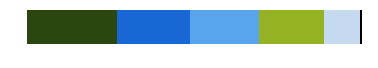

In [27]:
# To visualize according to their respective %
plt.figure(0)
plt.axis('off')

patch = np.zeros((50, 500, 3))

start = 0
for cx in range(km.n_clusters):
    width = int(DOM[cx][0] * patch.shape[1])
    end = start + width
    patch[:, start:end, :] = 255 - DOM[cx][1]
    start = end

plt.imshow(patch)
plt.show()